# Weather models : 3D parameters

The aim of this notebook is to indicate how to read the 3D data from the large-mesh french weather model called 'ARPEGE' (spatial resolution of 0.1°).

Per day, you have the weather model run of 00h with range forecasts from 00h to 24h. The time step is different according to days : it is 1h from 0h to 12h and rises to 3h after 12h (from 12h to 24h of range forecasts).

Finally, the 3D data are stored in 2 different netcdf files, according to the vertical levels:
* height levels (height in the file name) : 20, 100, 500, 875, 1375, 2000 and 3000 m
* isobar levels (isobar in the file name) : 1000, 950, 925, 850, 700, 600 and 500 hPa

The parameters are as follows:
* height levels (height in the file name) : pressure (in Pa)
* isobar levels (isobar in the file name) : temperature (in K), *pseudo-adiabatic potential temperature of the wet bulb* (in K), relative humidity (in %), wind speed (in m.s-1), wind direction (in °), *U and V wind components* (in m.s-1), *vertical velocity* (in Pa.s-1), *geopotential* (in m2.s-2)

For more information, cf [documentation](https://meteofrance.github.io/meteonet/english/data/weather-models/).

*Physical sense of variables*
* *pseudo-adiabatic potential temperature of the wet bulb* : temperature affected to an air particle brought back to its condensation level. It is about a near-conversative parameter. It allows to follow the state of an air particle in a satured atmosphere and then allows to follow the evolution of a perturbation, depression (or a satured air mass). For example, this parameter at 850hPa is very useful to know the depression structure and to follow its evolution.
* *horizontal wind speed components:*, U : from west to east and V : from south to north.
* *vertical velocity*: vertical speed; the displacement is expressed in Pa (in meteorology, the vertical levels are often expressed in isobar levels, cf weather_models_explanations.md for more details); The higher the height is, the lower the pressure is. If the vertical velocity is positive, there is an upward current (ex : the earth surface is warmed by the sun). The opposite corresponds to a downdraft (ex : an cold air mass passes above a warmer ground).
* *geopotential*: it is used to compute the pressure and takes account the local gravity variations of the Earth. The height of the geopotential is interesting in meteorology : it allows to get the constant pressure heights. A high geopotential (pressure levels have high heights) is often associated to an anticyclone and a low geopotential (pressure levels have low heights) corresponds to a depression.



In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
level = 'isobar'              #vertical level (height or isobar)
file_date = dt.datetime(2017, 2, 14) # Day example 
#parameter name in the file (cf cells below to know the parameter names -> exploration of metadata)
if level == 'isobar':
    param = 'w'
    level_name = 'isobaricInhPa'     #name of the vertical level  
    level_value = 850
else:
    param = 'pres'
    level_name = 'heightAboveGround'
    level_value = 20

In [3]:
fname = "/kaggle/input/defi-ia-2022-test/Train/Train/X_forecast/arpege_3D_%s_%s.nc" %(level,file_date.strftime('%Y%m%d'))
data = xr.open_dataset(fname)

In [4]:
data

<xarray.Dataset>
Dimensions:        (isobaricInhPa: 7, latitude: 58, longitude: 80, valid_time: 17, Id: 17)
Coordinates:
  * isobaricInhPa  (isobaricInhPa) int16 1000 950 925 850 700 600 500
  * latitude       (latitude) float32 51.9 51.8 51.7 51.6 ... 46.4 46.3 46.2
  * longitude      (longitude) float32 -5.842 -5.742 -5.642 ... 1.958 2.058
  * valid_time     (valid_time) datetime64[ns] 2017-02-14 ... 2017-02-15
  * Id             (Id) object '409_0' '409_1' '409_2' ... '409_21' '409_24'
Data variables:
    time           datetime64[ns] ...
    t              (valid_time, isobaricInhPa, latitude, longitude) float32 ...
    p3014          (valid_time, isobaricInhPa, latitude, longitude) float32 ...
    r              (valid_time, isobaricInhPa, latitude, longitude) float32 ...
    ws             (valid_time, isobaricInhPa, latitude, longitude) float32 ...
    p3031          (valid_time, isobaricInhPa, latitude, longitude) float32 ...
    u              (valid_time, isobaricInhPa, latitude, longitude) float32 ...
    v              (valid_time, isobaricInhPa, latitude, longitude) float32 ...
    w              (valid_time, isobaricInhPa, latitude, longitude) float32 ...
    z              (valid_time, isobaricInhPa, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             lfpw
    GRIB_centreDescription:  French Weather Service - Toulouse
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             French Weather Service - Toulouse
    history:                 2021-09-30T18:05:39 GRIB to CDM+CF via cfgrib-0....

In [5]:
coord = 'longitude'
data[coord]

<xarray.DataArray 'longitude' (longitude: 80)>
array([-5.842, -5.742, -5.642, -5.542, -5.442, -5.342, -5.242, -5.142, -5.042,
       -4.942, -4.842, -4.742, -4.642, -4.542, -4.442, -4.342, -4.242, -4.142,
       -4.042, -3.942, -3.842, -3.742, -3.642, -3.542, -3.442, -3.342, -3.242,
       -3.142, -3.042, -2.942, -2.842, -2.742, -2.642, -2.542, -2.442, -2.342,
       -2.242, -2.142, -2.042, -1.942, -1.842, -1.742, -1.642, -1.542, -1.442,
       -1.342, -1.242, -1.142, -1.042, -0.942, -0.842, -0.742, -0.642, -0.542,
       -0.442, -0.342, -0.242, -0.142, -0.042,  0.058,  0.158,  0.258,  0.358,
        0.458,  0.558,  0.658,  0.758,  0.858,  0.958,  1.058,  1.158,  1.258,
        1.358,  1.458,  1.558,  1.658,  1.758,  1.858,  1.958,  2.058],
      dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -5.842 -5.742 -5.642 ... 1.858 1.958 2.058

In [6]:
data[coord].values[0:10]

array([-5.842, -5.742, -5.642, -5.542, -5.442, -5.342, -5.242, -5.142,
       -5.042, -4.942], dtype=float32)

In [7]:
run_date = data['time']
#run_date.values     #get the values
run_date

<xarray.DataArray 'time' ()>
array('2017-02-14T00:00:00.000000000', dtype='datetime64[ns]')
Attributes:
    long_name:      initial time of forecast
    standard_name:  forecast_reference_time

In [8]:
range_forecasts_dates = data['valid_time']
range_forecasts_dates[0:10]

<xarray.DataArray 'valid_time' (valid_time: 10)>
array(['2017-02-14T00:00:00.000000000', '2017-02-14T01:00:00.000000000',
       '2017-02-14T02:00:00.000000000', '2017-02-14T03:00:00.000000000',
       '2017-02-14T04:00:00.000000000', '2017-02-14T05:00:00.000000000',
       '2017-02-14T06:00:00.000000000', '2017-02-14T07:00:00.000000000',
       '2017-02-14T08:00:00.000000000', '2017-02-14T09:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 2017-02-14 ... 2017-02-14T09:00:00
Attributes:
    standard_name:  time
    long_name:      time

In [9]:
info_level = data[level_name]
level_vals=info_level.values     #get the values
info_level

<xarray.DataArray 'isobaricInhPa' (isobaricInhPa: 7)>
array([1000,  950,  925,  850,  700,  600,  500], dtype=int16)
Coordinates:
  * isobaricInhPa  (isobaricInhPa) int16 1000 950 925 850 700 600 500

In [10]:
d = data[param]     #param : parameter name defined at the beginning of the Notebook 
d_vals=d.values     #get the values
###examples to get the information from attributes
#d.units                      #unit
#d.long_name                      #long name
d_vals[0:1,0:2,0:2,0:2]

array([[[[0.1217587 , 0.16171956],
         [0.15298867, 0.18025613]],

        [[0.05855989, 0.16084647],
         [0.26259613, 0.3284142 ]]]], dtype=float32)

The structure of the parameter (4 dimensions):
* number of steps or range forecasts
* number of vertical levels
* number of points in latitude
* number of points in longitude

In [11]:
d_vals.shape

(17, 7, 58, 80)

In [12]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [13]:
forecast_date = dt.datetime(2017, 2, 14,12,0)

/opt/conda/lib/python3.7/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/opt/conda/lib/python3.7/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_0_boundary_lines_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


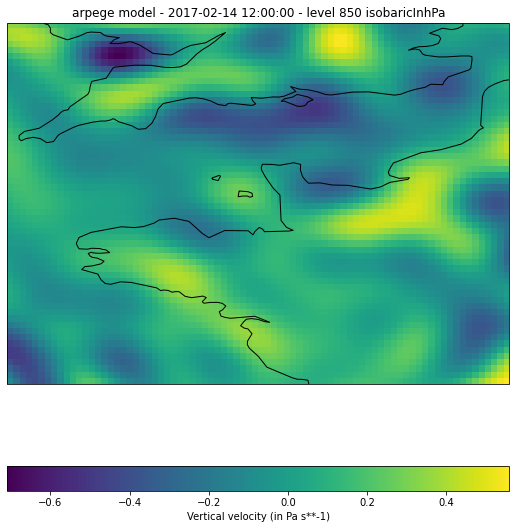

In [14]:
# Coordinates of studied area boundaries (in °N and °E)
lllat = 46.25  #lower left latitude
urlat = 51.896  #upper right latitude
lllon = -5.842  #lower left longitude
urlon = 2  #upper right longitude
extent = [lllon, urlon, lllat, urlat]

fig=plt.figure(figsize=(9,10))

# Select projection
ax = plt.axes(projection=ccrs.PlateCarree())

#plot the data and the background map (coastlines and borders)
if level_name == 'heightAboveGround':
    img = ax.imshow(data.sel(valid_time=forecast_date,heightAboveGround=level_value)[param], interpolation='none', origin='upper', extent=extent)
else:
    img = ax.imshow(data.sel(valid_time=forecast_date,isobaricInhPa=level_value)[param], interpolation='none', origin='upper', extent=extent)
ax.coastlines(resolution='50m', linewidth=1)
ax.add_feature(cfeature.BORDERS.with_scale('50m'))

plt.colorbar(img, orientation= 'horizontal').set_label(d.long_name+ ' (in '+d.units+ ')')
plt.title("arpege model - "+str(forecast_date) + ' - ' + 'level ' + str(level_value) + ' ' + level_name)
plt.show()